In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make("MountainCar-v0")
env.reset()

print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

SHOW_EVERY = 500 # renderiza el ejercicio cada n cantidad e iteraciones
LEARNING_RATE = 0.1 # es una variable que se encuentra entre 0 y uno tambien se le puede dar decaimiento
DISCOUNT = 0.95 # que tan importantes son las acciones futuras sobre las actuales 
EPISODIOS = 2000

DISCRETE_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_SIZE


epsilon = 0.5 # entre 0 y 1  es la probabilidad de elegir una accion aleatoria 
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODIOS // 2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING- START_EPSILON_DECAYING)

print(discrete_os_win_size)

## Variables Globales

q_table = np.random.uniform(low = -2, high = 0, size = (DISCRETE_SIZE + [env.action_space.n])) # esto me crea una tabla de 20x20xn donde n es el numero de acciones

ep_rewards = [] # guarda la recompenza de cada episodio

aggr_ep_rewards = {'ep' : [], 'avg': [], 'min': [], 'max':[]} # parametros para medir el rendimiento


print(q_table.shape)
print(q_table)



[0.6  0.07]
[-1.2  -0.07]
3
[0.09  0.007]
(20, 20, 3)
[[[-1.15614001 -0.61587312 -1.99438513]
  [-1.19556548 -1.24316609 -0.47615408]
  [-0.98022203 -1.11396609 -1.6310342 ]
  ...
  [-0.14831047 -0.94919137 -1.90153854]
  [-0.18606784 -1.76091246 -1.82787402]
  [-0.19174498 -0.85488379 -0.27068753]]

 [[-0.65432829 -0.96490353 -1.84948225]
  [-0.45067089 -0.8748993  -1.31140377]
  [-0.56641533 -0.03254103 -1.75011357]
  ...
  [-1.32597613 -1.46988239 -1.23206684]
  [-0.29009025 -1.96995479 -1.98562749]
  [-0.15397075 -0.29020977 -1.43197765]]

 [[-0.15849102 -0.35359537 -1.57385968]
  [-1.25694774 -1.06977082 -1.15999708]
  [-0.80471499 -0.40594499 -0.04327287]
  ...
  [-0.35280484 -0.49978687 -0.01555035]
  [-0.83663877 -0.8596491  -0.56176472]
  [-0.88806933 -0.06174038 -0.35501003]]

 ...

 [[-1.96294476 -0.41451949 -1.12714027]
  [-0.50969863 -1.10056459 -0.10230515]
  [-1.37164859 -1.57809177 -0.9677759 ]
  ...
  [-0.2989328  -1.86604545 -1.64732942]
  [-0.18159303 -0.12254775 -1.

In [4]:
def get_discrete_satate(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(int))




episode: 0, avg: -200.0, min: -200.0, max: -200.0
episode: 500, avg: -200.0, min: -200.0, max: -200.0
Logramos el Objetivo en el episodio:661 
Logramos el Objetivo en el episodio:674 
Logramos el Objetivo en el episodio:682 
Logramos el Objetivo en el episodio:715 
Logramos el Objetivo en el episodio:723 
Logramos el Objetivo en el episodio:725 
Logramos el Objetivo en el episodio:726 
Logramos el Objetivo en el episodio:728 
Logramos el Objetivo en el episodio:732 
Logramos el Objetivo en el episodio:740 
Logramos el Objetivo en el episodio:749 
Logramos el Objetivo en el episodio:823 
Logramos el Objetivo en el episodio:837 
Logramos el Objetivo en el episodio:838 
Logramos el Objetivo en el episodio:839 
Logramos el Objetivo en el episodio:840 
Logramos el Objetivo en el episodio:841 
Logramos el Objetivo en el episodio:842 
Logramos el Objetivo en el episodio:854 
Logramos el Objetivo en el episodio:856 
Logramos el Objetivo en el episodio:862 
Logramos el Objetivo en el episodio:8

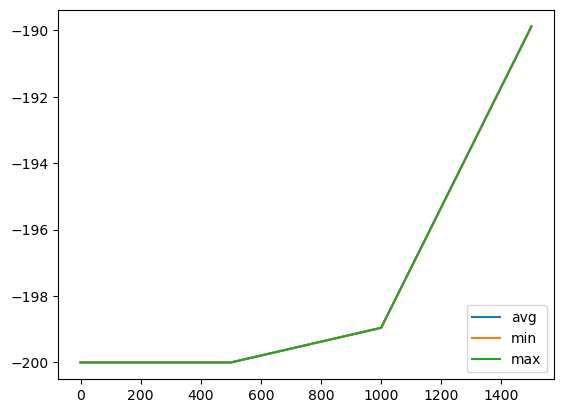

In [9]:
for episode in range(EPISODIOS):
    episode_reward = 0
    if episode % SHOW_EVERY == 0:
        render = True
    else:
        render = False
    discrete_state = get_discrete_satate(env.reset())
    done = False
    while not done:

        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
 
        new_state, reward ,done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state  = get_discrete_satate(new_state)
        if render:
            env.render() # esto lo hacemos para ver la evolucion del algoritmo cada n episodios

        if not done:
            max_future_q = np.max(q_table[new_discrete_state]) # le aplicaremos el descuento  max_future_q 
            current_q = q_table[discrete_state + (action, )]

            new_q = (1- LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)   # formula de
            q_table[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.goal_position:
            print(f"Logramos el Objetivo en el episodio:{episode} ")
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state
    
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    
    ep_rewards.append(episode_reward)

    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        
        print(f"episode: {episode}, avg: {average_reward}, min: {min(ep_rewards[-SHOW_EVERY:])}, max: {max(ep_rewards[-SHOW_EVERY:])}")

env.close()

plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label = 'avg' )
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label = 'min' )
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label = 'max' )
plt.legend(loc = 4)
plt.show()

In [8]:
env.close()